<a href="https://colab.research.google.com/github/NadiaMusafarudin/NadiaMusafarudin/blob/main/my_tweet_test_demo_latest_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=fc148722772835536bce6d6c23a8cb7fe42f859c44ddfe4127c123f674757e64
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 117.8 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [ ]:
#This code creates a new .h5 file with placeholders for training, development and test datasets. (dont run this code)
import h5py
from PIL import Image

fileName = 'data.h5'
numOfSamples = 10000
with h5py.File(fileName, "w") as out:
  out.create_dataset("X_train",(numOfSamples,256,256,3),dtype='u1')
  out.create_dataset("Y_train",(numOfSamples,1,1),dtype='u1')      
  out.create_dataset("X_dev",(numOfSamples,256,256,3),dtype='u1')
  out.create_dataset("Y_dev",(numOfSamples,1,1),dtype='u1')      
  out.create_dataset("X_test",(numOfSamples,256,256,3),dtype='u1')
  out.create_dataset("Y_test",(numOfSamples,1,1),dtype='u1')   

In [ ]:
!kill -9 -1

In [3]:
from google.colab import drive
from scipy import stats
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import torch


In [4]:
import re
import numpy as np
import pandas as pd
import os, json
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import f1_score, accuracy_score, classification_report
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!pip install torch

In [7]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 12.8 MB/s 
     |████████████████████████████████| 3.3 MB 36.8 MB/s 
     |████████████████████████████████| 895 kB 40.0 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
import torch

if torch.cuda.is_available():    

    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [9]:
missing_values = ["n/a", "na", "--"]
#df = pd.read_csv('gdrive/My Drive/thesis/dataset/cucukAZ_label_test.csv')
df = pd.read_csv('gdrive/My Drive/thesis/dataset/cucukmyAZ_latest_v3.csv') ## 0,1,2
#df = pd.read_csv('gdrive/My Drive/thesis/dataset/cucukmyAZ_latest_v4.csv') ##-1,0,1


df.set_index('id', inplace=True)
df.head()


,date,Label,tweet,language,hashtags,username
id,,,,,,
1.420000e+18,7/27/2021 19:18,1,My nerdy nerd got vaccinated. Ã°Å¸Â¤Å“Ã°Å¸ÂÂ»...,en,"['cucukmyaz', 'jkjav']",akashah
1.420000e+18,7/27/2021 16:08,1,Ready for 2nd dose of vaccine tomorrow #CucukM...,en,['cucukmyaz'],qeels88
1.420000e+18,7/27/2021 14:48,1,Done #CucukMyAZ #HartalDoktorKontrak https://...,en,"['cucukmyaz', 'hartaldoktorkontrak']",nfamohdnasir
1.420000e+18,7/27/2021 14:08,1,"Protection installed, FULLY vaccinated! Than...",en,['cucukmyaz'],ezypepper
1.420000e+18,7/27/2021 13:46,1,#CucukMyAZ 2nd dose done! https://t.co/QirsKs...,en,['cucukmyaz'],hadiharhar


In [10]:
##display the datatypes
#display(df.dtypes)
df.dtypes 

date        object
Label        int64
tweet       object
language    object
hashtags    object
username    object
dtype: object

In [11]:
#Remove twitter handlers
df.tweet= df.tweet.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
#df.tweet = df.tweet.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
df.tweet = df.tweet.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
df.tweet = df.tweet.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
df.tweet = df.tweet.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
df.tweet = df.tweet.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


In [12]:
df.head(100)


,date,Label,tweet,language,hashtags,username
id,,,,,,
1.420000e+18,7/27/2021 19:18,1,My nerdy nerd got vaccinated Ã Å Â Å Ã Å Â Â Ã...,en,"['cucukmyaz', 'jkjav']",akashah
1.420000e+18,7/27/2021 16:08,1,Ready for 2nd dose of vaccine tomorrow CucukMyAZ,en,['cucukmyaz'],qeels88
1.420000e+18,7/27/2021 14:48,1,Done CucukMyAZ HartalDoktorKontrak,en,"['cucukmyaz', 'hartaldoktorkontrak']",nfamohdnasir
1.420000e+18,7/27/2021 14:08,1,Protection installed FULLY vaccinated Thank yo...,en,['cucukmyaz'],ezypepper
1.420000e+18,7/27/2021 13:46,1,CucukMyAZ 2nd dose done,en,['cucukmyaz'],hadiharhar
...,...,...,...,...,...,...
1.420000e+18,7/26/2021 7:27,2,CucukMyAZ update 20hours in Sofelt like shit w...,en,['cucukmyaz'],Zukidesu1
1.420000e+18,7/26/2021 6:10,0,Why does cucukMYAZ sounds familiar Oh wait,en,['cucukmyaz'],hafizuddinsw
1.420000e+18,7/26/2021 6:00,1,Ã Å â â AstraZeneca Completed My Second Dose C...,en,"['cucukmyaz', 'astrazeneca', 'covid_19']",robert_nch


In [ ]:
# converting 'Label' from float to int
#df['Label'] = df['Label'].astype(int)
#df['Label'] = df.apply(['Label'].astype(int))

#df['Label'] = df['Label'].apply(np.int64)

#df['Label'] = df.apply('Label'.to_numeric)

#df.apply(pd.to_numeric)

In [13]:
#select useful columns

train= pd.DataFrame()
train['tweet']= df['tweet']
train['Sentiment']=df['Label']

In [14]:
train=train.dropna()

In [15]:
train.isnull().sum()

tweet        0
Sentiment    0
dtype: int64

In [ ]:
#train['Sentiment'] = train['Sentiment'].replace(['negative','neutral','positive'],[0,1,2])

###importing bert


In [16]:
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [17]:
print(tokenizer.tokenize("Hello. This is a sample statement for visualisation purposes"))

['hello', '.', 'this', 'is', 'a', 'sample', 'statement', 'for', 'visual', '##isation', 'purposes']


In [18]:
print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize("Hello. This is a sample statement for visualisation purposes")))

[7592, 1012, 2023, 2003, 1037, 7099, 4861, 2005, 5107, 6648, 5682]


##pre-processing


In [19]:
max_len = 0


for tweet in train['tweet']:
    
    # The following code is used to clean the tweets by removing URLs, accounts, quotation marks,etc
    #url_pattern = re.compile(r'https?://\S+|www\.\S+')
    #tweet = url_pattern.sub(r'', tweet)
    #tweet = re.sub('\S*@\S*\s?', '', tweet)
    #tweet = re.sub('\s+', ' ', tweet)
    #tweet = re.sub("\'", "", tweet)

    input_ids = tokenizer.encode(tweet, add_special_tokens=True)

    max_len = max(max_len, len(input_ids))        #maximum length of input ids

print('Max sequence length: ', max_len)

Max sequence length:  189


In [20]:
train.head(100)

,tweet,Sentiment
id,,
1.420000e+18,My nerdy nerd got vaccinated Ã Å Â Å Ã Å Â Â Ã...,1
1.420000e+18,Ready for 2nd dose of vaccine tomorrow CucukMyAZ,1
1.420000e+18,Done CucukMyAZ HartalDoktorKontrak,1
1.420000e+18,Protection installed FULLY vaccinated Thank yo...,1
1.420000e+18,CucukMyAZ 2nd dose done,1
...,...,...
1.420000e+18,CucukMyAZ update 20hours in Sofelt like shit w...,2
1.420000e+18,Why does cucukMYAZ sounds familiar Oh wait,0
1.420000e+18,Ã Å â â AstraZeneca Completed My Second Dose C...,1


In [21]:
input_ids = []
attention_masks = []

for sent in train['tweet']:
    
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 256, ## original 110           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
     
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train['Sentiment'].tolist())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


##datasets and dataloader

In [22]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(input_ids, attention_masks, labels)  #storing the input ids,masks and labels in dataset

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])  #90-10 train-val split
#train_dataset, val_dataset = train_test_split(dataset, train_size = 0.8, stratify])
#train_df, eval_df = train_test_split(df, test_size=0.2,stratify=df.label.values)

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

8,310 training samples
2,078 validation samples


In [ ]:
#df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
#df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [23]:
len(train_dataset)

8310

In [24]:
len(val_dataset)

2078

In [25]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 32

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset),     #random sampling in training
            batch_size = batch_size 
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset),    #sequential sampling in validation
            batch_size = batch_size 
        )

In [26]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 3,   
    output_attentions = False,
    output_hidden_states = False,
)



Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Tell pytorch to run this model on the GPU.
#model.cuda()

##optimiser and scheduler


In [27]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

In [28]:
from transformers import get_linear_schedule_with_warmup

epochs = 5


total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [29]:
# The function to get the accuracy 
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
#def f1_multiclass(labels, preds):
 #   return f1_score(labels, preds, average='micro')
    
#result, model, wrong_predictions = model.eval(val_dataset, f1=f1_multiclass, acc=accuracy_score)

In [30]:
# Function to calculate the accuracy of our predictions vs labels

import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [31]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    
    return str(datetime.timedelta(seconds=elapsed_rounded))

##training loop 

In [50]:
import random
import numpy as np


seed_val = 42
epochs=1

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

model.to(device)


training_stats = []

total_t0 = time.time()

for epoch_i in range(0, epochs):
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):
        
        # Printing the progress after every 40 epochs
        if step % 40 == 0 and not step == 0:
            
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            

    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():        

            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 3 ========
Training...
  Batch    40  of    260.    Elapsed: 0:01:38.
  Batch    80  of    260.    Elapsed: 0:03:16.
  Batch   120  of    260.    Elapsed: 0:04:53.
  Batch   160  of    260.    Elapsed: 0:06:30.
  Batch   200  of    260.    Elapsed: 0:08:07.
  Batch   240  of    260.    Elapsed: 0:09:44.

  Average training loss: 0.08
  Training epoch took: 0:10:32

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.72
  Validation took: 0:01:00

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    260.    Elapsed: 0:01:37.
  Batch    80  of    260.    Elapsed: 0:03:14.
  Batch   120  of    260.    Elapsed: 0:04:51.
  Batch   160  of    260.    Elapsed: 0:06:28.
  Batch   200  of    260.    Elapsed: 0:08:05.
  Batch   240  of    260.    Elapsed: 0:09:42.

  Average training loss: 0.06
  Training epoch took: 0:10:30

Running Validation...
  Accuracy: 0.83
  Validation Loss: 0.78
  Validation took: 0:01:00

======== Epoch 3 / 3 ========
Training...
 

In [51]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 5)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.08093,0.72191,0.82205,0:10:32,0:01:00
2,0.05622,0.77555,0.82542,0:10:30,0:01:00
3,0.10079,0.77555,0.82542,0:10:30,0:01:00


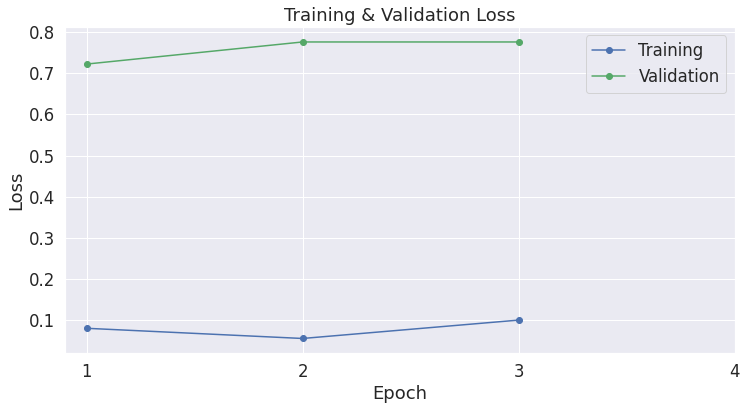

In [52]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()


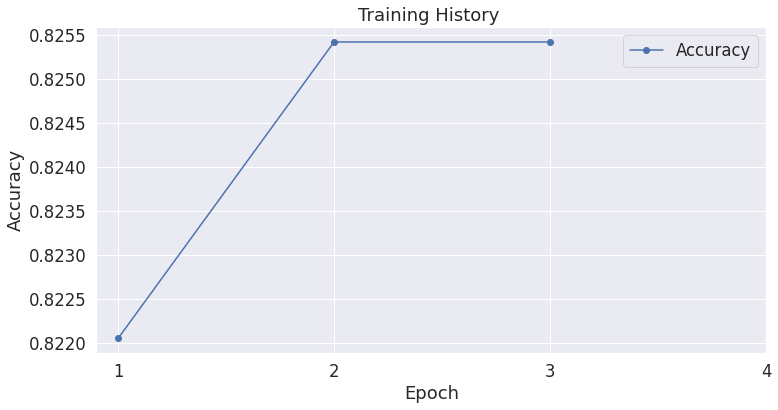

In [53]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Valid. Accur.'], 'b-o', label="Accuracy")
#plt.plot(df_stats['epoch'], 'g-o', label="Epoch")

# Label the plot.
plt.title("Training History ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

##Performance On Test Set

###Data Preparation


In [54]:
#df_vax = pd.read_csv('gdrive/My Drive/thesis/dataset/cucukmyAZ_28july_no_retweet_label_copy.csv')
df_vax = pd.read_csv('gdrive/My Drive/thesis/dataset/cucukmyAZ_latest_v3.csv')

df_vax.set_index('id', inplace=True)
df_vax.head()
#df_vax = pd.read_csv('vaccination_all_tweets.csv')
#df_vax


,date,Label,tweet,language,hashtags,username
id,,,,,,
1.42000e+18,7/27/2021 19:18,1,My nerdy nerd got vaccinated. Ã°Å¸Â¤Å“Ã°Å¸ÂÂ»...,en,"['cucukmyaz', 'jkjav']",akashah
1.42000e+18,7/27/2021 16:08,1,Ready for 2nd dose of vaccine tomorrow #CucukM...,en,['cucukmyaz'],qeels88
1.42000e+18,7/27/2021 14:48,1,Done #CucukMyAZ #HartalDoktorKontrak https://...,en,"['cucukmyaz', 'hartaldoktorkontrak']",nfamohdnasir
1.42000e+18,7/27/2021 14:08,1,"Protection installed, FULLY vaccinated! Than...",en,['cucukmyaz'],ezypepper
1.42000e+18,7/27/2021 13:46,1,#CucukMyAZ 2nd dose done! https://t.co/QirsKs...,en,['cucukmyaz'],hadiharhar


In [55]:
#Remove twitter handlers
df_vax.tweet= df_vax.tweet.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
#df.tweet = df.tweet.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
df_vax.tweet = df_vax.tweet.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
df_vax.tweet = df_vax.tweet.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
df_vax.tweet = df_vax.tweet.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
df_vax.tweet = df_vax.tweet.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [56]:
vax_tweets=df_vax['tweet']

In [57]:
vax_tweets.head()

id
1.42000e+18    My nerdy nerd got vaccinated Ã Å Â Å Ã Å Â Â Ã...
1.42000e+18     Ready for 2nd dose of vaccine tomorrow CucukMyAZ
1.42000e+18                   Done CucukMyAZ HartalDoktorKontrak
1.42000e+18    Protection installed FULLY vaccinated Thank yo...
1.42000e+18                              CucukMyAZ 2nd dose done
Name: tweet, dtype: object

In [58]:
#preprocessing the tweet
input_ids = []
attention_masks = []

for sent in vax_tweets:
    
    #url_pattern = re.compile(r'https?://\S+|www\.\S+')
    #tweet = url_pattern.sub(r'', tweet)
    #tweet = re.sub('\S*@\S*\s?', '', tweet)
    #tweet = re.sub('\s+', ' ', tweet)
    #tweet = re.sub("\'", "", tweet)
    
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 200,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
     
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [62]:
df_vax.head()
#vax_tweets.head()

,date,Label,tweet,language,hashtags,username
id,,,,,,
1.42000e+18,7/27/2021 19:18,1,My nerdy nerd got vaccinated Ã Å Â Å Ã Å Â Â Ã...,en,"['cucukmyaz', 'jkjav']",akashah
1.42000e+18,7/27/2021 16:08,1,Ready for 2nd dose of vaccine tomorrow CucukMyAZ,en,['cucukmyaz'],qeels88
1.42000e+18,7/27/2021 14:48,1,Done CucukMyAZ HartalDoktorKontrak,en,"['cucukmyaz', 'hartaldoktorkontrak']",nfamohdnasir
1.42000e+18,7/27/2021 14:08,1,Protection installed FULLY vaccinated Thank yo...,en,['cucukmyaz'],ezypepper
1.42000e+18,7/27/2021 13:46,1,CucukMyAZ 2nd dose done,en,['cucukmyaz'],hadiharhar


In [63]:
vax_dataset= TensorDataset(input_ids, attention_masks, labels) ## add labelss

batch_size = 32

vax_dataloader = DataLoader(
            vax_dataset,  
            sampler = SequentialSampler(vax_tweets),     #Sequential Sampling
            batch_size = batch_size 
        )

In [ ]:
# Create the DataLoader.
#prediction_data = TensorDataset(input_ids, attention_masks, labels)
#prediction_sampler = SequentialSampler(prediction_data)
#prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

##prediction


In [64]:
print('Predicting labels for {:,} vaccine tweets...'.format(len(input_ids)))

model.eval()

predictions, true_labels = [], []

for batch in vax_dataloader:
 
  batch = tuple(t.to(device) for t in batch)
  
  #b_input_ids, b_input_mask = batch

  b_input_ids, b_input_mask, b_labels = batch


  with torch.no_grad():

      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy() ## test
  
  logits=np.argmax(logits,axis=1)
  for i in range(len(logits)):
    predictions.append(logits[i])
    true_labels.append(label_ids[i])

  
print('    DONE.')


Predicting labels for 10,388 vaccine tweets...
    DONE.


In [ ]:
#predictions = []
#for x in model_outputs:
 #   predictions.append(np.argmax(x))

#print('f1 score:', f1_score(eval_df['label'], predictions,average='micro'))

#target_names = ['class 0', 'class 1', 'class 2']

#from sklearn.metrics import classification_report
#print(classification_report(val_dataset, predictions))#,sorted(possible_labels)))#,target_names=sorted(df['label'].unique())))


In [65]:
df_vax['Sentiment'] = predictions
df_vax=df_vax.dropna()      #drops the null values

In [66]:
df_vax.head(100)

,date,Label,tweet,language,hashtags,username,Sentiment
id,,,,,,,
1.42000e+18,7/27/2021 19:18,1,My nerdy nerd got vaccinated Ã Å Â Å Ã Å Â Â Ã...,en,"['cucukmyaz', 'jkjav']",akashah,1
1.42000e+18,7/27/2021 16:08,1,Ready for 2nd dose of vaccine tomorrow CucukMyAZ,en,['cucukmyaz'],qeels88,1
1.42000e+18,7/27/2021 14:48,1,Done CucukMyAZ HartalDoktorKontrak,en,"['cucukmyaz', 'hartaldoktorkontrak']",nfamohdnasir,1
1.42000e+18,7/27/2021 14:08,1,Protection installed FULLY vaccinated Thank yo...,en,['cucukmyaz'],ezypepper,1
1.42000e+18,7/27/2021 13:46,1,CucukMyAZ 2nd dose done,en,['cucukmyaz'],hadiharhar,1
...,...,...,...,...,...,...,...
1.42000e+18,7/26/2021 7:27,2,CucukMyAZ update 20hours in Sofelt like shit w...,en,['cucukmyaz'],Zukidesu1,2
1.42000e+18,7/26/2021 6:10,0,Why does cucukMYAZ sounds familiar Oh wait,en,['cucukmyaz'],hafizuddinsw,0
1.42000e+18,7/26/2021 6:00,1,Ã Å â â AstraZeneca Completed My Second Dose C...,en,"['cucukmyaz', 'astrazeneca', 'covid_19']",robert_nch,1


In [67]:
print(df_vax.dtypes)

date         object
Label         int64
tweet        object
language     object
hashtags     object
username     object
Sentiment     int64
dtype: object


In [68]:
df_vax['Sentiment']=df_vax['Sentiment'].map({0:'neutral',1:'positive',2:'negative'}) ##prediction from BERT
#df_vax['Sentiment']=df_vax['Sentiment'].map({0:'neutral',1:'positive',-1:'negative'}) ##prediction from BERT

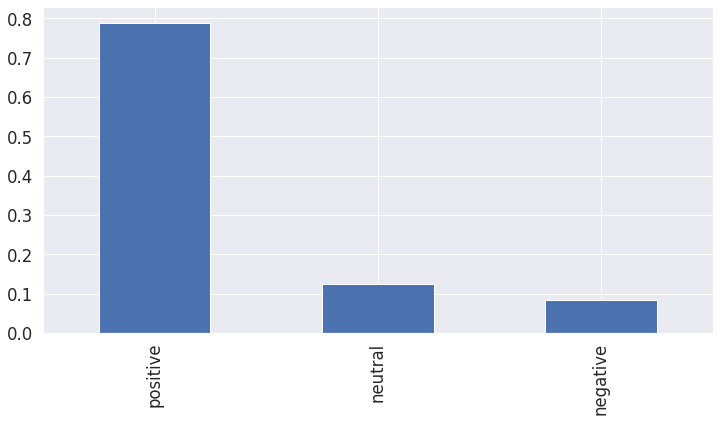

In [69]:
df_vax['Sentiment'].value_counts(normalize=True).plot.bar()

In [ ]:
#y_review_texts, y_pred, y_pred_probs, y_test = predictions

In [ ]:
#print('Positive samples: %d of %d (%.2f%%)' % (df_vax.Sentiment.sum(), len(df_vax.Sentiment), (df_vax.Sentiment.sum() / len(df_vax.Sentiment) * 100.0)))

#print('Positive samples: %d of %d (%.2f%%)' % (df_vax.Label.sum(), len(df_vax.Label), (df_vax.Label.sum() / len(df_vax.Label) * 100.0)))
#print('Positive samples from BERT: %d of %d (%.2f%%)' % (df_vax.Sentiment.sum(), len(df_vax.Sentiment), (df_vax.Sentiment.sum() / len(df_vax.Sentiment) * 100.0)))


In [ ]:
#from sklearn.metrics import matthews_corrcoef

#matthews_set = []
#pred_labels_i = np.argmax(predictions, axis=0)
# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
#for i in range(len(true_labels)):
 # pred_labels_i = np.argmax(predictions[i], axis=0).flatten()
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
#  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  #matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  #matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
result

SequenceClassifierOutput([('logits', tensor([[-0.2674, -0.8184,  0.4559],
                                   [-0.7842,  1.3792, -0.5698],
                                   [-1.5297,  2.7666, -1.5074],
                                   [-0.4407, -0.3871,  0.1517],
                                   [-1.0540,  2.0816, -1.1929],
                                   [-1.7738,  2.9677, -1.6756],
                                   [-1.3623,  2.7804, -1.6604],
                                   [-1.6122,  3.2082, -1.7875],
                                   [-1.3350,  2.8432, -1.6577],
                                   [-1.8178,  3.2123, -1.7732],
                                   [-1.4063,  2.8757, -1.7197],
                                   [-1.6543,  3.1688, -1.8200],
                                   [-1.6060,  2.9549, -1.7262],
                                   [-1.1232,  1.9165, -0.9713],
                                   [-0.2123, -0.8349,  0.3371],
                              

In [ ]:
 #logits=np.argmax(logits,axis=1)
  #for i in range(len(logits)):
   # predictions.append(logits[i])
    #true_labels.append(label_ids[i])